TODOs:
1. ~stopping criteria~                          (4p)   JACOB
2. ~linear systems~                             (2p)   JACOB
3. derivatives                                (6p)   LUKAS
4. line search - initial step length          (2p)   LUKAS
5. ~line search - wolfe condition~            (6p)   ???
6. Newton method with Hessian modification    (6p)
7. ~Quasi-Newton methods - initial $H_0$~      (2p) NOAH
8. ~efficient computations of quantities~       (2p)   JACOB

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy import linalg

In [2]:
class Functions:
    def __init__(self):   #TODO: (3.) remove hardcoded gradient and Hessian
        """
        entries of the form:
        [
        x0 = x,
        f(x) = f,
        f'(x) = g,
        f''(x) = h
        ]
        """
        self.function_list = [  
            [
            # Rosenbrock function stationary point: (1.2,1.2)
            np.array([1.2, 1.2], dtype=np.longdouble),
            lambda x: np.array(100*(x[1]-x[0]**2)**2 + (1-x[0])**2),
            lambda x: np.array([400*x[0]**3-2*x[0]*(200*x[1]-1)-2, 200*x[1]-200*x[0]**2]),
            lambda x: np.array([[1200*x[0]**2-2*(200*x[1]-1), -400*x[0]], [-400*x[0], 200]])
            ], [
            # Rosenbrock function stationary point: (-1.2,1)
            np.array([-1.2, 1], dtype=np.longdouble),
            lambda x: np.array(100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2),
            lambda x: np.array([400 * x[0] ** 3 - 2 * x[0] * (200 * x[1] - 1) - 2, 200 * x[1] - 200 * x[0] ** 2]),
            lambda x: np.array([[1200 * x[0] ** 2 - 2 * (200 * x[1] - 1), -400 * x[0]], [-400 * x[0], 200]])
            ], [
            # Rosenbrock function stationary point: (0,1)
            np.array([0, 1], dtype=np.longdouble),
            lambda x: np.array(100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2),
            lambda x: np.array([400 * x[0] ** 3 - 2 * x[0] * (200 * x[1] - 1) - 2, 200 * x[1] - 200 * x[0] ** 2]),
            lambda x: np.array([[1200 * x[0] ** 2 - 2 * (200 * x[1] - 1), -400 * x[0]], [-400 * x[0], 200]])
            ], [
            # Rosenbrock function stationary point: (-1,0)
            np.array([-1, 0], dtype=np.longdouble),
            lambda x: np.array(100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2),
            lambda x: np.array([400 * x[0] ** 3 - 2 * x[0] * (200 * x[1] - 1) - 2, 200 * x[1] - 200 * x[0] ** 2]),
            lambda x: np.array([[1200 * x[0] ** 2 - 2 * (200 * x[1] - 1), -400 * x[0]], [-400 * x[0], 200]])
            ], [
            # Rosenbrock function stationary point: (0,-1)
            np.array([0, -1], dtype=np.longdouble),
            lambda x: np.array(100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2),
            lambda x: np.array([400 * x[0] ** 3 - 2 * x[0] * (200 * x[1] - 1) - 2, 200 * x[1] - 200 * x[0] ** 2]),
            lambda x: np.array([[1200 * x[0] ** 2 - 2 * (200 * x[1] - 1), -400 * x[0]], [-400 * x[0], 200]])
            ], [
            # second special function stationary point: (-0.2, 1.2)
            np.array([-0.2, 1.2], dtype=np.longdouble),
            lambda x: 1/10*np.array([150 * (x[0] * x[1]) ** 2 + (1/2 * x[0] + 2 * x[1] - 2) ** 2]),
            lambda x: 1/10*np.array([x[0]*(300*x[1]**2+0.5)+2*x[1]-2,
                                300*x[0]**2 *x[1]+2*x[0]+8*x[1]-8]),
            lambda x: 1/10*np.array([[300 * x[1] ** 2 + 0.5, 600 * x[0] * x[1] + 2],
                                [600 * x[0] * x[1] + 2, 300*x[0] ** 2 + 8]])
            ], [
            # second special function stationary point: (3.8, 0.1)
            np.array([3.8, 0.1], dtype=np.longdouble),
            lambda x: 1/10*np.array([150 * (x[0] * x[1]) ** 2 + (1/2 * x[0] + 2 * x[1] - 2) ** 2]),
            lambda x: 1/10*np.array([x[0]*(300*x[1]**2+0.5)+2*x[1]-2,
                                300*x[0]**2 *x[1]+2*x[0]+8*x[1]-8]),
            lambda x: 1/10*np.array([[300 * x[1] ** 2 + 0.5, 600 * x[0] * x[1] + 2],
                                [600 * x[0] * x[1] + 2, 300*x[0] ** 2 + 8]])
            ], [
            # second special function stationary point: (0, 0)
            np.array([0, 0], dtype=np.longdouble),
            lambda x: 1/10*np.array([150 * (x[0] * x[1]) ** 2 + (1/2 * x[0] + 2 * x[1] - 2) ** 2]),
            lambda x: 1/10*np.array([x[0]*(300*x[1]**2+0.5)+2*x[1]-2,
                                300*x[0]**2 *x[1]+2*x[0]+8*x[1]-8]),
            lambda x: 1/10*np.array([[300 * x[1] ** 2 + 0.5, 600 * x[0] * x[1] + 2],
                                [600 * x[0] * x[1] + 2, 300*x[0] ** 2 + 8]])
            ], [
            # second special function stationary point: (-1, 0)
            np.array([-1, 0], dtype=np.longdouble),
            lambda x: 1/10*np.array([150 * (x[0] * x[1]) ** 2 + (1/2 * x[0] + 2 * x[1] - 2) ** 2]),
            lambda x: 1/10*np.array([x[0]*(300*x[1]**2+0.5)+2*x[1]-2,
                                300*x[0]**2 *x[1]+2*x[0]+8*x[1]-8]),
            lambda x: 1/10*np.array([[300 * x[1] ** 2 + 0.5, 600 * x[0] * x[1] + 2],
                                [600 * x[0] * x[1] + 2, 300*x[0] ** 2 + 8]])
            ], [
            # second special function stationary point: (0, -1)
            np.array([0, -1], dtype=np.longdouble),
            lambda x: 1/10*np.array([150 * (x[0] * x[1]) ** 2 + (1/2 * x[0] + 2 * x[1] - 2) ** 2]),
            lambda x: 1/10*np.array([x[0]*(300*x[1]**2+0.5)+2*x[1]-2,
                                300*x[0]**2 *x[1]+2*x[0]+8*x[1]-8]),
            lambda x: 1/10*np.array([[300 * x[1] ** 2 + 0.5, 600 * x[0] * x[1] + 2],
                                [600 * x[0] * x[1] + 2, 300*x[0] ** 2 + 8]])
            ]
        ]

    def get_function(self, i):
        """
        returns a function-set with a specific index
        
        x0 = starting point
        f = function
        g = gradient of function
        h = 2nd gradient of function
        """
        x0, f, g, h = self.function_list[i]  # TODO return below implemented functions for 
        return x0, f, g, h                   # gradient and Hessian

    # TODO: edit functions for point (3.)
    def get_gradient():
        """
        should take some input and returns the gradient
        :return:
        """
        pass

    def get_hessian():
        """
        should take some input and returns the Hessian
        :return:
        """
        pass


In [86]:
# max number of steps / amount of steps after we give up
K = 30000

def linear_solve(A, b):  
    """
    Should solve a linear system of the form A*x=b. A and b are given and x should be returned
    A: a matrix of form nxm
    b: a vector of length n
    return: a vector x of length m
    """
    try:
        x = linalg.solve(A,b)
    except linalg.LinAlgError: 
        A += 0.01
        x = linalg.solve(A,b)
    return x

# Cholesky with Added Multiple of the Identity (Alg. 3.3 - page 51)
def hessian_modification(hess, b=1e-3):
    if min(np.diag(hess)) > 0:
        tau = 0
    else:
        tau = -min(np.diag(hess))+b
    for k in range(K):
        try:
            L = linalg.cholesky(hess + (np.eye(hess.shape[0])*tau))
            return L @ L.T
        except linalg.LinAlgError:
            tau = max(2*tau, b)
    
    return hess

In [87]:
# # # # # # # # # # # # # # # # # # # # # # # # # #
#                                               #
#   L I N E - S E A R C H                     #
#                                           #
# # # # # # # # # # # # # # # # # # # # # #

# line-search method for Steepest Descent & Newton
def line_search(x_0, f, g, h, a_max=10, c1=10e-4, c2=0.1, acc=0.1, eps=1e-5, method='steepest_descent'):
    """
    x_0:   starting point
    f:     function
    g:     gradient of function
    h:     2nd gradient of function
    a_max: the maximal step length that is ok for us
    c1:    parameter for wolfe condition 1
    c2:    parameter for wolfe condition 2
    acc:   accuracy for "fine-tuning" alpha
    eps: used for relative stopping criterion
    method: method
    """ 
    # start at k=0 with x_0
    k=0
    x_k = x_0
    g_0 = g(x_0)
    g_k = g_0

    # initialize stopping criteria (1.)
    stop_crit_1 = False
    stop_crit_2 = False
    stop_crit_3 = False
    
    # when the gradient is smaller than the stopping criterion, we are done
    while k <= K and not stop_crit_1 and not stop_crit_2 and not stop_crit_3 :  #TODO: stop crit (1.)   DONE
        
        if k>0:
            # prepare for next step
            x_k = x_kp1.copy()
            g_k = g(x_k)
            
        # TODO: maybe set here the inital step length to try (4.)
        # choose B_k according to method
        if method == 'steepest_descent':
            B_k = np.identity(n=len(x_k), dtype=np.longdouble)
        elif method == 'newton':     # TODO: hessian modification (5.)
            B_k = hessian_modification(h(x_k)) #
        else:
            print('input correct method')
        
        # (3.2)
        p_k = linear_solve(A=-B_k, b=g_k)  
        
        # find alpha that satisfies strong wolfe
        a_k = find_alpha(x_k, f, g, p_k, a_max, c1, c2, acc) # TODO: pass inital step length (4.)
        
        # (3.1)
        x_kp1 = x_k + a_k * p_k
        
        # needed for stop crit
        if k==0:
            x_1 = x_kp1
        
        # formulate stopping criteria (1.)
        stop_crit_1 = (la.norm(f(x_kp1) - f(x_k)) <= eps * la.norm(f(x_1) - f(x_0)))
        stop_crit_2 = (la.norm(x_kp1 - x_k) <= eps * la.norm(x_1 - x_0))
        stop_crit_3 = (la.norm(g_k) <= eps * la.norm(g_0)) or (la.norm(g_k) <= eps * (1+la.norm(g_0)))
        
        k += 1
    #print('stpcrt1:', eps * la.norm(f(x_1) - f(x_0)))
    #print('stpcrt2:', eps * la.norm(x_1 - x_0))
    #print('stpcrt3:', eps * la.norm(g_0), eps * (1+la.norm(g_0)))
    
    # returns the x for which the minimum g was found after k steps
    return x_k, g_k, k-1
    
    
def find_alpha(x_k, f, g, p_k, a_max=10, c1=10e-4, c2=0.1, acc=0.5):   # a_max = 100, acc = 0.01 for first
    """
    helps to select the alpha, that satisfies the strong wolfe conditions
    
    a_max: the maximal step length
    c1: see wolfe condition 1 (3.7a)
    c2: see wolfe condition 2 (3.7b)
    acc: accuracy
    """
    # lowest alpha possible (step size 0)
    a_l = np.longdouble(0)
    
    # our starting-alpha
    a_i = np.longdouble(1) # TODO: set initial step length (4.)
    
    # phi is f(x_k) in beginning
    phi_0 = f(x_k)
    
    # gradient of phi
    gphi_0 = g(x_k) @ p_k

    i = 0
    while True:
        
        # (3.3)
        phi_i = f(x_k + a_i * p_k)
        
        # (3.7a) if wolfe 1 is violated or current phi >= last phi:
        if (phi_i > phi_0 + c1 * a_i * gphi_0) or (i > 0 and phi_i >= f(x_k + a_l * p_k)):
            
            # search for alpha between too-high-alpha and lowest-alpha
            return finetune(a_l, a_i, x_k, f, g, p_k, c1, c2)
        
        # calculate gradient of current phi
        gphi_i = g(x_k + a_i * p_k) @ p_k
        
        # (3.7b) if wolfe 2 is satisfied:
        if la.norm(gphi_i) <= -c2 * gphi_0:
            
            # we are done! return found alpha
            return a_i
        
        # if not sattisfied and gradient positive:
        if gphi_i >= 0:
            
            # take a closer look, to see if we can find alpha in between
            return finetune(a_i, a_l, x_k, f, g, p_k, c1, c2)
        
        # if gradient is not positive:
        else:
            # current alpha is now lowest alpha
            a_l = a_i.copy()
            
            # make alpha a bit bigger ...
            a_i += acc * a_max
            
            # ... but not bigger than a_max!
            if a_i >= a_max:
                return a_max
        
        # prepare for next step
        i += 1

# helper for find_alpha
def finetune(a_lo, a_hi, x_k, f, g, p_k, c1=10e-4, c2=0.1):
    """
    helps to find right alpha if wolfe codndition isn't satisfied anymore
    
    a_lo: lowest alpha so far
    a_hi: highest alpha (which did not satisfy wolfe anymore)
    """
    def phi(a): return f(x_k + a * p_k)
    def gphi(a): return g(x_k + a * p_k) @ p_k
    
    # calculate phi of a_k = 0
    phi_0 = phi(0)
    gphi_0 = gphi(0)
    j = 0

    while j < 10:
        # computes new alpha between lowest and highest alpha ...
        a_j = (a_lo + a_hi) / 2
        
        # ... and the corresponding phi
        phi_j = phi(a_j)
        
        # check if new alpha violates wolfe 1
        if phi_j > phi_0 + c1 * a_j * gphi_0 or phi_j >= phi(a_lo):
            
            # if yes: we have a new highest alpha
            a_hi = a_j.copy()
        
        # if no: check wolfe 2 with new alpha
        else:
            gphi_j = gphi(a_j)
            
            # when satisfied: return the new alpha
            if la.norm(gphi_j) <= -c2 * gphi_0:
                return a_j
            
            # if not: set a_hi to a_lo and a_lo to a_j
            if gphi_j * (a_hi - a_lo) >= 0:
                a_hi = a_lo.copy()
            a_lo = a_j.copy()
            
        # repeat
        j += 1
    
    # after 10 steps, just return the until then found alpha
    return a_j


# # # # # # # # # # # # # # # # # # # # # # # # # #
#                                               #
#   C O N J U G A T E   G R A D I E N T       #
#                                           #
# # # # # # # # # # # # # # # # # # # # # #

def polak_ribiere_plus(x_0, f, g, c1=10e-4, c2=0.1, a_max=10, acc=0.1, eps=1e-5):
    """
    non-linear version of conjugate gradient:
    Fletcher-Reeves updated by Polak and Ribiere - and even the + version!
    
    c2=0.1 for conj. grad. 
    c2=0.9 for Newton
    """
    x_k = x_0
    
    f_k = f(x_k)   # f_0
    g_0 = g(x_k)
    g_k = g_0
    p_k = -g_0     # p_0
    k = 0
    
    # initialize stopping criteria (1.)
    stop_crit_1 = False
    stop_crit_2 = False
    stop_crit_3 = False
    
    while k <= K and not stop_crit_1 and not stop_crit_2 and not stop_crit_3 :  #TODO: stop crit (1.)   DONE
        
        if k>0:
            # (5.41c) / prepare for next step
            g_k = g_kp1
            x_k = x_kp1
            p_k = p_kp1
            
        # find alpha using line search
        a_k = find_alpha(x_k, f, g, p_k, c1=c1, c2=c2, a_max=a_max, acc=acc)
        
        # first line in Alg 5.4 (FR)
        x_kp1 = x_k + a_k * p_k
        
        # needed for stop crit
        if k==0:
            x_1 = x_kp1
        
        g_kp1 = g(x_kp1)
        
        # (5.44) - Polak Ribiere Method
        b_kp1 = (g_kp1.T @ (g_kp1 - g_k)) / la.norm(g_k)**2
        
        # (5.45) - Polak Ribiere +
        b_kp1 = max(b_kp1, 0)
        
        # (5.41b)
        p_kp1 = -g_kp1 + b_kp1 * p_k
        
        # formulate stopping criteria (1.)
        stop_crit_1 = (la.norm(f(x_kp1) - f(x_k)) <= eps * la.norm(f(x_1) - f(x_0)))
        stop_crit_2 = (la.norm(x_kp1 - x_k) <= eps * la.norm(x_1 - x_0))
        stop_crit_3 = (la.norm(g_k) <= eps * la.norm(g_0)) or (la.norm(g_k) <= eps * (1+la.norm(g_0)))
        
        k += 1
        
    return x_k, g_k, k


# # # # # # # # # # # # # # # # # # # # # # # # # #
#                                               #
#   Q U A S I - N E W T O N                   #    
#                                           #
# # # # # # # # # # # # # # # # # # # # # #

# Broyden, Fletcher, Goldfarb, Shanno (Alg 6.1) + (6.20)
def BFGS(x_0, f, g, a_max=100, acc=0.01, eps=1e-5):
    
    # initialize
    H_0 = np.identity(n=len(x_0))
    I = np.identity(n=len(x_0))
    k = 0
    
    # prepare for first step
    x_k = x_0
    H_k = H_0  # TODO: choose inital Hessian appropriate (7.)
    g_0 = g(x_0)
    g_k = g_0
    
    # initialize stopping criteria (1.)
    stop_crit_1 = False
    stop_crit_2 = False
    stop_crit_3 = False
    
    # stop after max_steps (K) or the extremum has been approximated closely enough
    while k <= K and not stop_crit_1 and not stop_crit_2 and not stop_crit_3 :  #TODO: stop crit (1.)   DONE
        
        if k>0:
            # prepare for next step
            x_k = x_kp1.copy()
            g_k = g(x_k)
        
        # (6.18) - compute search direction
        p_k = -H_k @ g_k
        
        # select alpha, that best satsfies (3.7)
        a_k = find_alpha(x_k, f, g, p_k, c1=10e-4, c2=0.9, a_max=a_max, acc=acc)
        
        # (6.3) - calculate next step
        x_kp1 = x_k + a_k * p_k
        
        # needed for stop crit
        if k==0:
            x_1 = x_kp1
        
        # (6.5) - define s_k and y_k / needed for hessian update
        s_k = x_kp1 - x_k
        y_k = g(x_kp1) - g_k
        
        # reshape from (1,) to (1,1) / [...] --> [[...]]
        s_k = s_k.reshape(s_k.shape[0], 1)
        y_k = y_k.reshape(y_k.shape[0], 1)
        
        # (6.20)
        # scale the starting matrix after the first step has been computed 
        # but before the first BFGS update is performed
        if k == 0:
            H_k = ((y_k.T @ s_k) / (y_k.T @ y_k)) * I
        
        # (6.14)
        rho_k = np.longdouble(1 / (y_k.T @ s_k))
        
        # (6.17) - (BFGS)
        H_kp1 = (I - rho_k * s_k @ y_k.T) @ H_k @ (I - rho_k * y_k @ s_k.T) + rho_k * s_k @ s_k.T
        
        # formulate stopping criteria (1.)
        stop_crit_1 = (la.norm(f(x_kp1) - f(x_k)) <= eps * la.norm(f(x_1) - f(x_0)))
        stop_crit_2 = (la.norm(x_kp1 - x_k) <= eps * la.norm(x_1 - x_0))
        stop_crit_3 = (la.norm(g_k) <= eps * la.norm(g_0)) or (la.norm(g_k) <= eps * (1+la.norm(g_0)))
        
        k += 1

    return x_k, g_k, k


In [88]:
# # # # # # # # # # # # # # # # # # # # # # # # # #
#                                               #
#   1 / 2   V A R .   P R O B L E M S         #
#                                           #
# # # # # # # # # # # # # # # # # # # # # #

def print_format(func_name, x_k, g_xk, k):
    
    rounding = True
    dec = 9
    
    if rounding:
        print(func_name + ":", "\t", round(x_k[0], dec), "\t\t", round(g_xk[0], dec), "\t\t", k)
        print("\t\t\t", round(x_k[1], dec), "\t\t", round(g_xk[1], dec))
    else:
        print(func_name + ":", "\t", x_k, "\t\t", g_xk, "\t\t", k)

def print_function_results(idcs):

    # get all functions, gradients and starting-points
    func = Functions()
    
    # for each function:
    for t in idcs:
        x_t, f_t, g_t, h_t = func.get_function(t)
        
        #print(g_t(x_t))
        #print(h_t(x_t))
        
        print('-' * 100)
        
        if t < 5:
            name = f"Rosenbrock {x_t}:"
        else:
            name = f"Alternative {x_t}:"
            
        print(name, "\t", "x_k", "\t\t\t", "g(x_k)", "\t\t", "k")
        print('-' * 100)
        # ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
        
        # Line Search / Steepest Descent
        x_k, g_xk, k = line_search(x_0    = x_t.copy(), 
                                   f      = f_t, 
                                   g      = g_t,
                                   h      = h_t,
                                   a_max  = 10, 
                                   c1     = 10e-4,
                                   c2     = 0.1, 
                                   acc    = 0.1, 
                                   method = 'steepest_descent'
                                  )
        print_format("Steepest Descent",  x_k, g_xk, k)
        
        # ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
        
        # Line Search / Newton's Method
        x_k, g_xk, k = line_search(x_0    = x_t.copy(), 
                                   f      = f_t, 
                                   g      = g_t,
                                   h      = h_t,
                                   a_max  = 10, 
                                   c1     = 10e-4,
                                   c2     = 0.9, 
                                   acc    = 0.1, 
                                   method = 'newton'
                                  )
        print_format("Newton's Method",  x_k, g_xk, k)
        
        # ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
        
        # Algorithm 5.4 (Polak-Ribiere +)
        x_k, g_xk, k = polak_ribiere_plus(x_0   = x_t.copy(), 
                                          f     = f_t, 
                                          g     = g_t, 
                                          c1    = 10e-4, 
                                          c2    = 0.1, 
                                          a_max = 10, 
                                          acc   = 0.1)  # c2=0.1 for conj. grad. c2=0.9 for Newton
        print_format("Conjugate Gradient",  x_k, g_xk, k)
        
        # ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
        
        # Algorithm 6.1 (BFGS) +(6.20)
        x_k, g_xk, k = BFGS(x_0   = x_t.copy(), 
                            f     = f_t, 
                            g     = g_t, 
                            a_max = 10, 
                            acc   = 0.1)
        print_format("Quasi - Newton",  x_k, g_xk, k)
        
        # ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~
        
        print("\n")
        
def rosenbrock():
    idcs = [0, 1, 2, 3, 4]
    print_function_results(idcs)
    
def alternative():
    idcs = [5, 6, 7, 8, 9]
    print_function_results(idcs)

In [89]:
# # # # # # # # # # # # # # # # # # # # # # # # # #
#                                               #
#   L E A S T   S Q U A R E S                 #    
#                                           #
# # # # # # # # # # # # # # # # # # # # # #


def create_data(f, q, m):
    """
    creates data points for least square problem
    :param f: function to approximate
    :param q: interval length
    :param m: number of data-points
    :return: set of data points (a,b)
    """
    
    # uniformly create m datapoints a_j ∊ [-q, q] for j=1, ..., m
    a = np.random.uniform(-q, q, m)
    a.sort()
    
    # calculate function values
    b = f(a)
    
    # return array: [[a1, a2, a3, ...,] , [b1, b2, b3, ...]]
    return np.array((a, b))


def plot_data(data, poly, ks):
    """
    plots the curves
    
    data[0]: a_j
    data[1]: b_j
    
    """
    names = ["Steepest Descent", "Newton's Method", "Conjugate Gradient", "Quasi - Newton"]
    markers = ["s", "v", "*", "x"]

    fig = plt.figure(figsize=(10, 10))
    
    # plot the "real" function
    plt.plot(data[0], data[1], "bo", label="original")
    
    # plot each approximation method on top
    for p, n, m, k in zip(poly, names, markers, ks):
        plt.plot(data[0], p(data[0]), marker=m,  label=n + "(k="+str(k)+")")

    plt.legend()
    plt.ylim(min(data[1])-0.5, max(data[1])+0.5)
    plt.show()


def second_5(function, n, q, m):
    """
    function: function to be approximated
    """
    # n = 4    # degree of polynomial
    # q = 2    # interval length of to-be-created data
    # m = 100  # number of datapoints
    
    
    # create data around given function
    data = create_data(function, q, m)
    a_j = data[0].copy()
    b_j = data[1].copy()
    
    # [1, a_j, a_j^2, a_j^3, ..., a_j^n]
    c_j = np.array([data[0] ** i for i in range(n + 1)])
    
    # definitions see task-sheet p.2
    def f(x): return np.array([(1/2)*np.sum((c_j.T @ x - data[1])**2)])
    def g(x): return c_j @ (c_j.T @ x - data[1])
    def h(x): return c_j @ c_j.T
    
    # initialize xS
    x_init = np.array([1 for i in range(n+1)], dtype=np.longdouble)
    xs = []
    ks = []
    poly = []

    algorithms =[lambda x: line_search(x.copy(), f, g, h, a_max=10, c1=10e-4, c2=0.1, acc=0.01, method='steepest_descent'),
                 lambda x: line_search(x.copy(), f, g, h, a_max=10, c1=10e-4, c2=0.9, acc=0.01, method='newton'),
                 lambda x: polak_ribiere_plus(x.copy(), f, g, c1=10e-4, c2=0.1, a_max=0.1, acc=1e-3),
                 lambda x: BFGS(x.copy(), f, g, a_max=100, acc=0.1)
                ]

    for alg in algorithms:
        x, _, k = alg(x_init)
        xs.append(x)
        ks.append(k)
        poly.append(np.poly1d(x[::-1]))
        print(x)
        
    plot_data(data, poly, ks)

In [90]:
rosenbrock()

----------------------------------------------------------------------------------------------------
Rosenbrock [1.2 1.2]: 	 x_k 			 g(x_k) 		 k
----------------------------------------------------------------------------------------------------
Steepest Descent: 	 1.111396551 		 0.138650407 		 4
			 1.235391566 		 0.037854488
Newton's Method: 	 1.202121197 		 0.370139133 		 5
			 1.445166297 		 0.014184619
Conjugate Gradient: 	 1.000149647 		 0.021397171 		 9
			 1.00024658 		 -0.01054736
Quasi - Newton: 	 1.111221402 		 -0.156004021 		 4
			 1.235664425 		 0.170284168


----------------------------------------------------------------------------------------------------
Rosenbrock [-1.2  1. ]: 	 x_k 			 g(x_k) 		 k
----------------------------------------------------------------------------------------------------
Steepest Descent: 	 1.301558264 		 0.658952707 		 8
			 1.693946667 		 -0.021449742
Newton's Method: 	 -1.192879457 		 -4.756775412 		 8
			 1.422183833 		 -0.155512988
Conj

In [91]:
alternative()

----------------------------------------------------------------------------------------------------
Alternative [-0.2  1.2]: 	 x_k 			 g(x_k) 		 k
----------------------------------------------------------------------------------------------------
Steepest Descent: 	 0.00016989 		 0.007677755 		 43
			 1.012235381 		 0.009823159
Newton's Method: 	 2.836e-06 		 3.8873e-05 		 4
			 0.999768501 		 -0.000184632
Conjugate Gradient: 	 -0.000196378 		 -0.005778798 		 5
			 1.000650185 		 0.00048203
Quasi - Newton: 	 -2.984e-06 		 0.002993353 		 45
			 1.015428976 		 0.012342584


----------------------------------------------------------------------------------------------------
Alternative [3.8 0.1]: 	 x_k 			 g(x_k) 		 k
----------------------------------------------------------------------------------------------------
Steepest Descent: 	 3.796498961 		 -0.010184459 		 5
			 -4.8368e-05 		 -0.061653135
Newton's Method: 	 2.837e-06 		 8.5327e-05 		 162
			 1.000000328 		 8.3e-07
Conjugate 

[-0.02052736  0.95063334  0.0313464  -0.1249496  -0.00749761]
[-2.16422161e-03  9.68076622e-01  1.63081634e-03 -1.31042981e-01
 -1.23842942e-04]
[-0.0153933   0.96504666  0.01937353 -0.12987296 -0.00414275]
[-0.02142738  0.94911061  0.03288811 -0.12463379 -0.00780578]


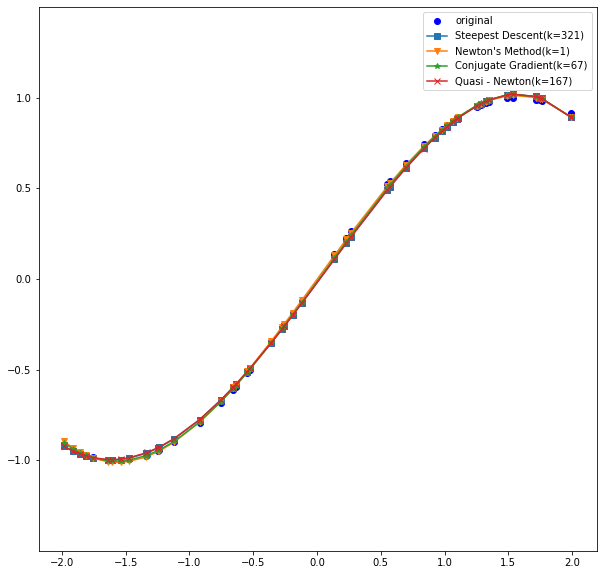

In [22]:
def function_6(x): return np.sin(x)
second_5(function_6, n=4, q=2, m=50)

[ 9.57220550e-01  7.16795979e-04 -4.30849626e-01 -5.03249261e-05
  1.93174740e-02]
[ 9.97619823e-01  4.46824817e-04 -4.90155371e-01 -2.04267615e-04
  3.45844299e-02]
[ 1.00243162 -0.00768297 -0.49878831  0.00271403  0.03703093]
[ 9.54881179e-01  8.02633767e-04 -4.27368416e-01  1.00187950e-04
  1.85180496e-02]


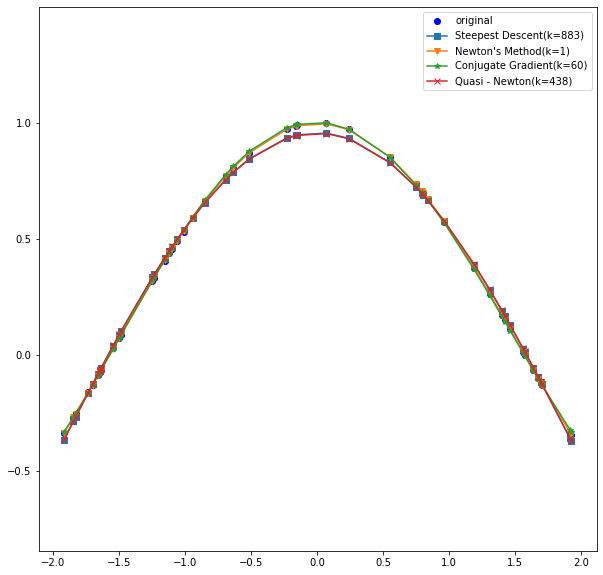

In [23]:
def function_7(x): return np.cos(x)
second_5(function_7, n=4, q=2, m=50)

[-2.41954675e+82  1.86640121e+82 -6.80326779e+82  5.94989599e+82
 -2.08996953e+83]
[1.9993879  0.68753161 0.11524957 0.06168062 0.01267085]
[1.989134   0.68429558 0.12934082 0.0626117  0.00920015]
[1.9793165  0.68647095 0.14730735 0.06146075 0.00440174]


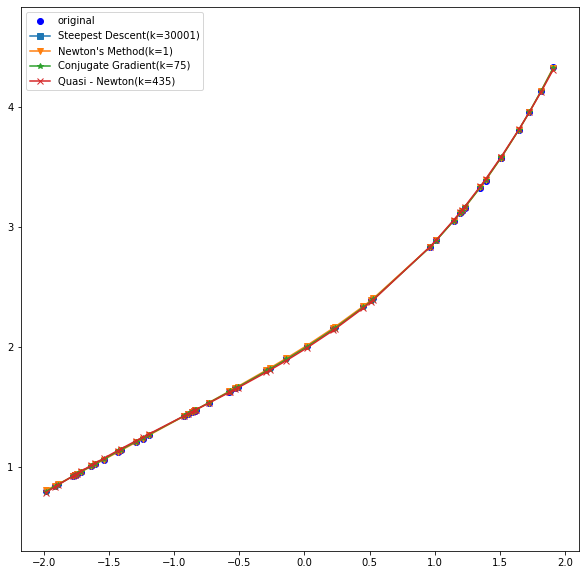

In [24]:
def function_8(x): return 2**x + np.cos(0.5*x)
second_5(function_8, n=4, q=2, m=50)

[ 3.62651934e-03  9.76901470e-01  4.99439721e+00 -1.36286671e-01
  6.57477762e-04]
[-2.89104612e-03  9.83274113e-01  5.01199081e+00 -1.40275400e-01
 -5.43048453e-03]
[-3.74626503e-03  9.91341551e-01  5.01772314e+00 -1.44350947e-01
 -7.96903561e-03]
[ 4.21537533e-03  9.76291426e-01  4.99277089e+00 -1.35972403e-01
  1.20302142e-03]


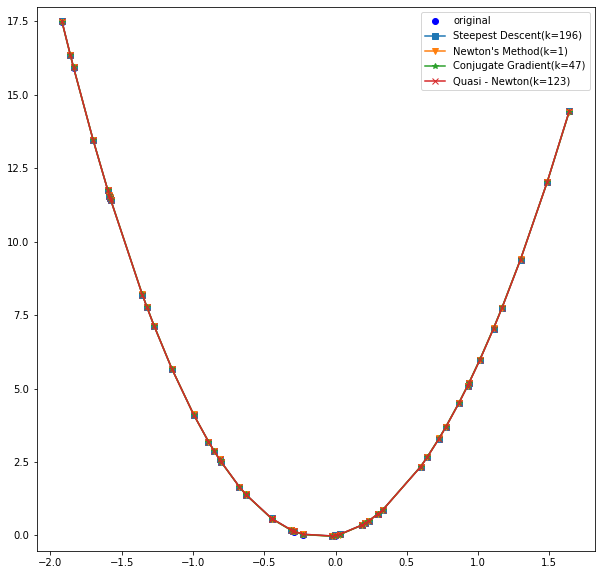

In [25]:
def function_9(x): return 5*x**2 + np.sin(x)
second_5(function_9, n=4, q=2, m=50)

[-9.97174255  1.98502683 -0.05278212 -2.99442707  0.01415339]
[-1.00000000e+01  2.00000000e+00 -1.49658064e-13 -3.00000000e+00
  4.20774526e-14]
[-1.00083329e+01  2.00488606e+00  1.78028714e-02 -3.00200337e+00
 -5.05802782e-03]
[-9.9675188   1.98268085 -0.06078854 -2.99384304  0.01608054]


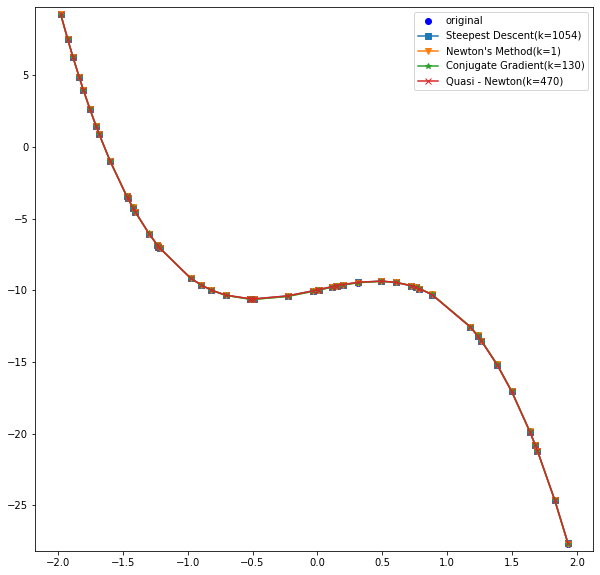

In [27]:
def function_10(x): return 2*x-3*x**3-10
second_5(function_10, n=4, q=2, m=50)